In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=53914b47dc8ca8f3bce5d44e96e211f39395cc9c8450a34e620cdcf044094a4a
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [ ]:
import os
import re
from pathlib import Path
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import random
import wget
random.seed()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Please add necessary imports here
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# !pip install whoosh
# from whoosh.analysis import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
filename = wget.download("https://github.com/MIE451-2021/course-datasets/raw/main/20_newsgroups.zip", "20_newsgroups.zip")
!unzip 20_newsgroups.zip
DATA_DIR = "20_newsgroups"

## Functions from lab

**PLEASE DO NOT CHANGE FUNCTION/CLASS NAMES**

**PLEASE DO NOT CHANGE/OVERWRITE COMPLETED FUNCTIONS**

In [ ]:
def clean_file_text(text):
    new_text = re.sub("Newsgroups:.*?\n", "", text)
    new_text = re.sub("Xref:.*?\n", "", new_text)
    new_text = re.sub("Path:.*?\n", "", new_text)
    new_text = re.sub("Date:.*?\n", "", new_text)
    new_text = re.sub("Followup-To:.*?\n", "", new_text)
    return new_text

In [ ]:
def corpus_count_words(file_list):
    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            word_counter.update(file_words)
    return word_counter

In [ ]:
def get_topic_name(file_path):
    return file_path.parent.name

def get_target(topic_name):
    topics = ['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball', 
     'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc', 
     'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics',
     'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc']
    return topics.index(topic_name)

In [ ]:
def plot_confusion_matrix(cm):
    # plot the confusion matrix
    plt.figure(figsize=(10,10))
    plt.matshow(cm, fignum=1)
    
    # add labels for all targets
    num_targets = cm.shape[0]
    plt.xticks(list(range(num_targets+1)))
    plt.yticks(list(range(num_targets+1)))

## Q1

In [ ]:
class MLQ1():
    def binary_baseline_data(self, file_list, num_words=1000):
        # Calculate word count in corpus
        news_cnt = corpus_count_words(file_list)

        # Select the most common numWords
        word_list = [word for (word, freq) in news_cnt.most_common(num_words)]

        # Create a binary encoding of dataset based on the selected features (X)
        tokenizer = RegexpTokenizer(r'\w+')
        df_rows = []
        for file_path in file_list:
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                file_data = file.read()
                file_data = clean_file_text(file_data)
                file_words = tokenizer.tokenize(file_data)
                df_rows.append([1 if word in file_words else 0 for word in word_list])
        X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)

        # Create a dataframe of targets (y)
        y = [get_target(get_topic_name(file_path)) for file_path in file_list]

        return X, y

    def binary_improved_data(self, file_list, num_words=1000):
        # Put your code here for Q1b
        # Make sure you update the variable features and targets below

        # X = None
        # y = None

        # Calculate word count in corpus
        tokenizer = RegexpTokenizer(r'\w+')
        # tokenizer = RegexTokenizer() | StemFilter()
        news_cnt = Counter()
        for file_path in file_list:
          with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            stop_words = set(stopwords.words("english"))
            file_words = [w.lower() for w in file_words]
            filtered_file_words = [w for w in file_words if not w in stop_words]
            news_cnt.update(filtered_file_words)

        # Select the most common numWords
        word_list = [word for (word, freq) in news_cnt.most_common(num_words)]

        # Create a binary encoding of dataset based on the selected features (X)
        tokenizer = RegexpTokenizer(r'\w+')
        df_rows = []
        for file_path in file_list:
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                file_data = file.read()
                file_data = clean_file_text(file_data)
                file_words = tokenizer.tokenize(file_data)
                df_rows.append([1 if word in file_words else 0 for word in word_list])
        X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)

        # Create a dataframe of targets (y)
        y = [get_target(get_topic_name(file_path)) for file_path in file_list]

        # Calculate word count in corpus

        # validate return types
        assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"

        return X, y

    def train_and_predict_baseline(self, file_list):
        # get the baseline data
        X, y = self.binary_baseline_data(file_list)

        # split to train and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # train a logistic regression classifier
        clf = LogisticRegression(C=1.0).fit(X_train, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)

        # calculate train and test accuracy
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)

        return X, y, train_accuracy, test_accuracy

    def train_and_predict_improved(self, file_list):
        # get the baseline data
        X, y = self.binary_improved_data(file_list)

        # Write your code here for Q1c:
        # You need to split the data and train a logistic regression classifier.
        # Then, you need to calculate the variables train_accuracy and test_accuracy for the new classifier

        # split to train and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # train a logistic regression classifier
        clf = LogisticRegression(C=1.0).fit(X_train, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)

        # calculate train and test accuracy
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)

        return X, y, train_accuracy, test_accuracy

    @staticmethod
    def random_mean_ci(X, y, num_tests):
        # train_results is a list of train accuracy results for the differrent random splits of the dataset
        train_results = []

        # test_results is a list of test accuracy results for the differrent random splits of the dataset
        test_results = []

        # Write your code here for Q1d

        random_state = list(np.random.randint(1,1000, num_tests))
        for rs in random_state:
          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)
          clf = LogisticRegression(C=1.0).fit(X_train, y_train)

          y_train_predict = clf.predict(X_train)
          y_test_predict = clf.predict(X_test)

          train_accuracy = accuracy_score(y_train, y_train_predict)
          test_accuracy = accuracy_score(y_test, y_test_predict)

          train_results.append(train_accuracy)
          test_results.append(test_accuracy)

        # calculate the train mean and the 95% confidence interval for the list of results
        train_mean = np.mean(train_results)
        train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))

        # calculate the test mean and the 95% confidence interval for the list of results
        test_mean = np.mean(test_results)
        test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))

        # validate return types
        assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
        assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"

        return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high

    @staticmethod
    def random_cm(X, y, num_tests):
        # cm_list is a list of confusion matrices for the different random splits of the dataset
        cm_list = []

        # Write your code here for Q1f
        random_state = list(np.random.randint(1,1000, num_tests))
        for rs in random_state:
          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)
          clf = LogisticRegression(C=1.0).fit(X_train, y_train)

          # y_train_predict = clf.predict(X_train)
          y_test_predict = clf.predict(X_test)
          cm = confusion_matrix(y_test,y_test_predict)
          cm_list.append(cm)
          
        # sum the confusion matrices and return the combined confusion matrix
        combined_cm = np.array(cm_list).sum(axis=0)
        

        # validate return type
        assert isinstance(combined_cm, np.ndarray), "return type"

        return combined_cm



Please do not change this global variable

In [ ]:
all_files = [pth for pth in Path(DATA_DIR).glob("**/*") if pth.is_file() and not pth.name.startswith(".")]

In [ ]:
q1 = MLQ1()
X, y, train_accuracy, test_accuracy = q1.train_and_predict_baseline(all_files)
# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.9432021147388726
Test accuracy: 0.6865


### Q1 (a)

[Write your answer here]

In [ ]:
len(all_files)

19997

1. The feature set is the most frequent 1000 words (tokens) in the file.
2. There are 19997 files in the dataset.
3. The hyperparameter is C parameter in logistic regression, i.e inverse of regularization strength.

### Q1 (b)

Implement *binary_improved_data*

### Q1 (c)

Implement *train_and_predict_improved*

In [ ]:
X, y, train_accuracy, test_accuracy = q1.train_and_predict_improved(all_files)
# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))


Train accuracy: 0.9137672358362506
Test accuracy: 0.6675


[Write your answer here]

Before the change, we use `binary_baseline_data`, we have train accuracy = 0.94 and test accuracy = 0.69; After the change, we use `binary_improved_data`, we have train accuracy = 0.91 and test accuracy = 0.67. Both the train accuracy and test accuracy decrease.


### Q1 (d)

Implement *random_mean_ci*


### Q1 (e)

Use the following code to calculate the mean accuracy and 95% confidence interval over 10 random splits

In [ ]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = MLQ1.random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.9124812459812818
Train confidence interval over 10 random splits: [0.9117339905321975, 0.913228501430366]
Test mean accuracy over 10 random splits: 0.6647000000000001
Test confidence interval over 10 random splits: [0.6621578752788941, 0.667242124721106]


[ Write your answer here ]

Train mean accuracy over 10 random splits is 0.913 and the train accuracy for single trial is 0.914; Test mean accuracy over 10 random splits: 0.665 and the test accuracy for single trial is 0.668. Both the train accuracy and test accuracy do not change too much.

Yes. Train confidence interval over 10 random splits: `[0.9117, 0.9132]`, which means that over repeated sampling, we have 95% confident that the true train accuracy is between  `[0.9117, 0.9132]`; Similarly, test confidence interval over 10 random splits: `[0.662, 0.667]`, which means that over repeated sampling, we have 95% confident that the true test accuracy is between `[0.662, 0.667]`

Based on the CI for train and test accuracy, both the train and test accuracy for single trial falls in the CI and is reasonable.


### Q1 (f)

Implement *random_cm*


### Q1 (g)

Use the following code to produce a confusion matrix for 10 random splits

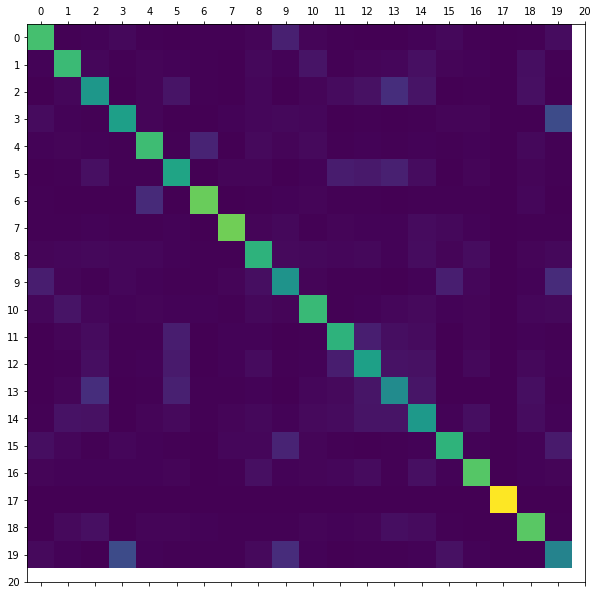

In [ ]:
cm10 = MLQ1.random_cm(X, y, num_tests = 10)
plot_confusion_matrix(cm10)

[ Write your answer here ]

Yes. For example, top 4 are more easily to confused with top 20, since the corresponding block between 4 and 20 is darker than the other (except 4 itself)

## Q2

In [ ]:
class MLQ2():
    def feature_num(self, X, y):
        # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
        # where numFeatures is the number of words used as features
        result_list = []

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        for p in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
            subset_size = int(p*X.shape[1])
            X_train_subset = X_train.iloc[:, 0:subset_size]
            X_test_subset = X_test.iloc[:, 0:subset_size]
            # Write your code here to calculate train_accuracy and test_accuracy for the current subset of features
            # ......
                    
            # train a logistic regression classifier
            clf = LogisticRegression(C=1.0).fit(X_train_subset, y_train)

            # predict on train and test set
            y_train_predict = clf.predict(X_train_subset)
            y_test_predict = clf.predict(X_test_subset)
            
            train_accuracy = accuracy_score(y_train, y_train_predict)
            test_accuracy = accuracy_score(y_test, y_test_predict)
            # add to result_list
            result_list.append((p, train_accuracy, test_accuracy))

        # Make a dataframe of the results
        result_df = pd.DataFrame(result_list, columns=["num_features", "train_accuracy", "test_accuracy"])

        # validate return type
        assert isinstance(result_df, pd.DataFrame), "return type"

        return result_df

### Q2 (a)

Implement *feature_num*

### Q2 (b)

Use the following code to plot the train and test accuracy for the different feature sets sizes

<AxesSubplot:xlabel='num_features'>

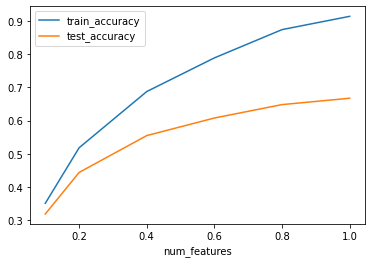

In [ ]:
q2 = MLQ2()
feature_num_df = q2.feature_num(X, y)
feature_num_df.plot(x="num_features", y=["train_accuracy", "test_accuracy"])

[ Write your answer here ]

As the number of features increase, the train and test accuracy increase, i.e. as the number of words used as features increase, the train and test accuracy increase.

## Q3

In [ ]:
class MLQ3():
    def hyperparameter(self, X, y):
        # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
        # where numFeatures is the number of words used as features
        result_list = []

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        for param in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
            # Write your code here to calculate train_accuracy and test_accuracy for the current parameter value
            # ......

            # train a logistic regression classifier
            clf = LogisticRegression(C=param).fit(X_train, y_train)
            y_train_predict = clf.predict(X_train)
            y_test_predict = clf.predict(X_test)


            # calculate train and test accuracy
            train_accuracy = accuracy_score(y_train, y_train_predict)
            test_accuracy = accuracy_score(y_test, y_test_predict)

            # add to result_list
            result_list.append((param, train_accuracy, test_accuracy))

        # Make a dataframe of the results
        result_df = pd.DataFrame(result_list, columns=["param", "train_accuracy", "test_accuracy"])

        # validate return type
        assert isinstance(result_df, pd.DataFrame), "return type"

        return result_df

### Q3 (a)

Implement *hyperparameter*

### Q3 (b)

Use the following code to plot the train and test accuracy for the different the parameters

<AxesSubplot:xlabel='param'>

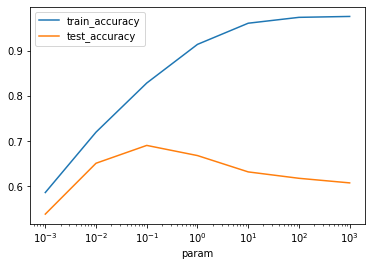

In [ ]:
q3 = MLQ3()
param_df = q3.hyperparameter(X, y)
param_df.plot(x="param", y=["train_accuracy", "test_accuracy"], logx=True)

[ Write your answer here ]

As the hyperparameter C increase, the train accuracy keep increase; the test accuracy first increase, after `C = 0.1`, test accuracy starts to decrease and the model is overfitting.

## Q4

In [ ]:
class MLQ4():
    def tf_improved_data(self, file_list, num_words = 1000):
        # Put your code here
        # Make sure you update the variable features and targets below

        # X = None
        # y = None

         # Calculate word count in corpus
        tokenizer = RegexpTokenizer(r'\w+')
        # tokenizer = RegexTokenizer() | StemFilter()
        news_cnt = Counter()
        for file_path in file_list:
          with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            stop_words = set(stopwords.words("english"))
            file_words = [w.lower() for w in file_words]
            filtered_file_words = [w for w in file_words if not w in stop_words]
            news_cnt.update(filtered_file_words)

        # Select the most common numWords
        # word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
        top_word = news_cnt.most_common(num_words)

        # Create a binary encoding of dataset based on the selected features (X)
        tokenizer = RegexpTokenizer(r'\w+')
        df_rows = []
        for file_path in file_list:
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                file_data = file.read()
                file_data = clean_file_text(file_data)
                file_words = tokenizer.tokenize(file_data)
                df_rows.append([wordCount if word in file_words else 0 for (word,wordCount) in top_word])
                
        # validate return types
        assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"

        return X, y


### Q4 (a)

Implement *tf_improved_data*

### Q4 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

In [ ]:
q4 = MLQ4()
X_tf, y_tf = q4.tf_improved_data(all_files)
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = MLQ1.random_mean_ci(X_tf, y_tf, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.9122954918911196
Train confidence interval over 10 random splits: [0.9109995940007983, 0.9135913897814408]
Test mean accuracy over 10 random splits: 0.6633333333333333
Test confidence interval over 10 random splits: [0.6601076103819865, 0.6665590562846802]


[ Write your answer here ]

For binary encoding, train mean accuracy is 0.913, for TF encoding, train mean accuracy is 0.912; For binary encoding, test mean accuracy is 0.6647, for TF encoding, test mean accuracy is 0.6633. The test mean accuracy for binary encoding is better.

For binary encoding, the CI for train accuracy is `[0.912, 0.914]`, for TF encoding, the CI for train accuracy is `[0.911, 0.914]`; For binary encoding, the CI for test accuracy is `[0.662, 0.667]`, for TF encoding, the CI for test accuracy is `[0.660, 0.667]`. The CI for test accuracy for binary encoding is better.

Because in this case, document frequency is not considered，rare terms are more informative than frequent terms and terms with very high TF may cause the model overfits the data.

## Q5

In [ ]:
class MLQ5():
    def nb_random_mean_ci(self, X, y, num_tests):
        # train_results is a list of train accuracy results for the differrent random splits of the dataset
        train_results = []

        # test_results is a list of test accuracy results for the differrent random splits of the dataset
        test_results = []

        # Write your code here
        random_state = list(np.random.randint(1,1000, num_tests))
        for rs in random_state:
          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)
          clf = MultinomialNB().fit(X_train, y_train)

          y_train_predict = clf.predict(X_train)
          y_test_predict = clf.predict(X_test)

          train_accuracy = accuracy_score(y_train, y_train_predict)
          test_accuracy = accuracy_score(y_test, y_test_predict)

          train_results.append(train_accuracy)
          test_results.append(test_accuracy)

        # calculate the train mean and the 95% confidence interval for the list of results
        train_mean = np.mean(train_results)
        train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))

        # calculate the test mean and the 95% confidence interval for the list of results
        test_mean = np.mean(test_results)
        test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))

        # validate return types
        assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
        assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"

        return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high


### Q5 (a)

Implement *nb_random_mean_ci*


### Q5 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

In [ ]:
q5 = MLQ5()
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = q5.nb_random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.733835821961849
Train confidence interval over 10 random splits: [0.7324490384867791, 0.735222605436919]
Test mean accuracy over 10 random splits: 0.6681666666666666
Test confidence interval over 10 random splits: [0.6638579978635454, 0.6724753354697878]


[ Write your answer here ]

For Naive Bayes, train mean accuracy is 0.734, for Logistic regression, train mean accuracy is 0.913; For Naive Bayes, test mean accuracy is 0.668, for Logistic regression, test mean accuracy is 0.665. The test mean accuracy for Naive Bayes Classifier is better.

For Naive Bayes, the CI for train accuracy is `[0.732, 0.735]`, for Logistic regression, CI for train accuracy is `[0.912, 0.914]`; For Naive Bayes, the CI for test accuracy is `[0.664, 0.672]`, for Logistic regression, the CI for test accuracy is `[0.662, 0.667]`. The CI for test accuracy for Naive Bayes is better.

Naive Bayes has a higher bias and low variance, logistic regression has low bias and higher variance. Naive Bayes figures out how the data was generated given the results.


## Q6

In [ ]:
class MLQ6():
    def binary_med_data(self, file_list, num_words = 1000):
        # Put your code here
        # Make sure you update the variable features and targets below

        # X = None
        # y = None

        #Please remember to put index for your dataframe as the file name
        #For example: pd.DataFrame(data, index=[str(f) for f in file_list],columns=[])
        # Calculate word count in corpus
        tokenizer = RegexpTokenizer(r'\w+')
        # tokenizer = RegexTokenizer() | StemFilter()
        news_cnt = Counter()
        for file_path in file_list:
          with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            stop_words = set(stopwords.words("english"))
            file_words = [w.lower() for w in file_words]
            filtered_file_words = [w for w in file_words if not w in stop_words]
            news_cnt.update(filtered_file_words)

        # Select the most common numWords
        word_list = [word for (word, freq) in news_cnt.most_common(num_words)]

        # Create a binary encoding of dataset based on the selected features (X)
        tokenizer = RegexpTokenizer(r'\w+')
        df_rows = []
        for file_path in file_list:
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                file_data = file.read()
                file_data = clean_file_text(file_data)
                file_words = tokenizer.tokenize(file_data)
                df_rows.append([1 if word in file_words else 0 for word in word_list])
        X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)

        # Create a dataframe of targets (y)
        y = [1 if get_target(get_topic_name(file_path)) == get_target('sci.med') else 0 for file_path in file_list]

        # validate return types
        assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"

        return X, y

### Q6 (a)

Implement *binary_med_data*


### Q6 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

In [ ]:
q6 = MLQ6()
X, y = q6.binary_med_data(all_files)
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = MLQ1.random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.9830535114667429
Train confidence interval over 10 random splits: [0.9823837577824295, 0.9837232651510563]
Test mean accuracy over 10 random splits: 0.9696666666666667
Test confidence interval over 10 random splits: [0.9676511529823016, 0.9716821803510317]


[ Write your answer here ]

Train mean accuracy over 10 random splits is 0.983, test mean accuracy over 10 random splits is 0.970.

Train confidence interval over 10 random splits: `[0.982, 0.984]`, which means that over repeated sampling, we have 95% confident that the true train accuracy is between `[0.982, 0.984]`; Similarly, test confidence interval over 10 random splits: `[0.968, 0.972]`, which means that over repeated sampling, we have 95% confident that the true test accuracy is between `[0.968, 0.972]`.

In Q1, train mean accuracy over 10 random splits is 0.913, test mean accuracy over 10 random splits is 0.665; Train confidence interval over 10 random splits: `[0.912, 0.914]`, test confidence interval over 10 random splits: `[0.662, 0.667]`. The performance for binary logistic regression is better than multiclass logistic regression.



# Q7

## Q7(a)
use the following code cell to implement your feature encoding

In [ ]:
def data_q7(file_list, num_words = 5000):
  # X = None
  # y = None

    tokenizer = RegexpTokenizer(r'\w+')
    
    news_cnt = Counter()
    for file_path in file_list:
      with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        file_data = file.read()
        file_data = clean_file_text(file_data)
        file_words = tokenizer.tokenize(file_data)
        stop_words = set(stopwords.words("english"))
        file_words = [w.lower() for w in file_words]
        filtered_file_words = [w for w in file_words if not w in stop_words]
        news_cnt.update(filtered_file_words)
        # news_cnt.update(file_words)

    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]

    tokenizer = RegexpTokenizer(r'\w+')
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            df_rows.append([1 if word in file_words else 0 for word in word_list])
    X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)

    y = [get_target(get_topic_name(file_path)) for file_path in file_list]


  #Please remember to put index for your dataframe as the file name
  #For example: pd.DataFrame(data, index=[str(f) for f in file_list],columns=[])
  
  # validate return types
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
  
    return X, y

## Q7(b)
Use the following code cell to implement your model

In [ ]:
def build_model_q7():
  #write your code here, define your model
  # MODELQ7=None
  MODELQ7 = MultinomialNB()
  return MODELQ7

Code for evaluating p at k

In [ ]:
def calculate_average_precision_at_k(MODELQ7, all_files, training_files, testing_files,k=None):
  
  training_files = [str(f) for f in open(training_files,mode='r').read().splitlines()]
  testing_files = [str(f) for f in open(testing_files,mode='r').read().splitlines()]
  if k is None:
    k=len(testing_files)

  X, y = data_q7(all_files) 
  X['gt'] = y
  training = X.loc[training_files]
  X_train = training.loc[:,training.columns!='gt']
  y_train = training['gt'].values

  testing = X.loc[testing_files]
  X_test = testing.loc[:,testing.columns!='gt']
  y_test = testing['gt'].values

  MODELQ7.fit(X_train,y_train)
  y_pred = MODELQ7.predict(X_test)
  y_pred_prob = MODELQ7.predict_proba(X_test)
  confidences = np.max(y_pred_prob,axis=1)
  
  p_at_k = []
  rel_at_k = []
  confidence_order = np.argsort(confidences)
  for i in range(1,k+1):
    top_confidence = confidence_order[-i:]
    pred_top_i = y_pred[top_confidence]
    gt_top_i = np.array(y_test)[top_confidence]
    p_at_i = np.sum(pred_top_i == gt_top_i)/i
    rel_at_i = (pred_top_i[0] == gt_top_i[0])
    p_at_k.append(p_at_i)
    rel_at_k.append(rel_at_i)
  print('average precision at {} is {}'.format(k,np.dot(p_at_k,rel_at_k)/k))
  return np.dot(p_at_k,rel_at_k)/k

In [ ]:
# Example usage:
######This line of code must be able to run on Google Colab in under 15 minutes.#####
######Code that runs longer than 15 minutes on the autograder will receive 0 marks for Q7#####
#num_words = 5000
m = calculate_average_precision_at_k(build_model_q7(), all_files, 'training_files_Q7.txt', 'testing_files_Q7.txt') #9'30

average precision at 4000 is 0.6308599673155211


In [ ]:
# Example usage:
######This line of code must be able to run on Google Colab in under 15 minutes.#####
######Code that runs longer than 15 minutes on the autograder will receive 0 marks for Q7#####
#num_words = 1000
# m = calculate_average_precision_at_k(build_model_q7(), all_files, 'training_files_Q7.txt', 'testing_files_Q7.txt') #2'

average precision at 4000 is 0.412694142077338


In [ ]:
# Example usage:
######This line of code must be able to run on Google Colab in under 15 minutes.#####
######Code that runs longer than 15 minutes on the autograder will receive 0 marks for Q7#####
#num_words = 7500
# m = calculate_average_precision_at_k(build_model_q7(), all_files, 'training_files_Q7.txt', 'testing_files_Q7.txt') #13'51

average precision at 4000 is 0.6521382599700901


# Q7(c)

Please write your answers here

1. The feature set is 5000 most frequent words in the file; The feature encoding method is binary encoding 
2. The classifier is multinomial naive bayes.
3. Based on the training above, when use 1000 most frequent words, we have `AP = 0.413`; When use 5000 most frequent words, we have `AP = 0.631`. Using 5000 most frequent words will have better performance and ensure the run time is within 15 min.

Based on Q4, we know that binary encoding perform better than TF : when using TF encoding, document frequency is not considered，rare terms are more informative than frequent terms and terms with very high TF may cause the model overfits the data.

Based on Q5, we know that multinominal NB perform better than logistic regression: Naive Bayes figures out how the data was generated given the results. 